# **YOLOv8 Detection**

## *Import Libraries*

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics 8.3.36 🚀 Python-3.8.13 torch-2.4.1+cu121 CUDA:0 (Tesla V100-PCIE-32GB, 32494MiB)
Setup complete ✅ (40 CPUs, 187.1 GB RAM, 4.9/20.0 GB disk)


In [4]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

ModuleNotFoundError: No module named 'tensorflow'

In [20]:
import zipfile
import os

# Define paths
zip_file_path = '/mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored.zip'
extract_to_path = '/mnt/nrdstor/amilab/towfiqami/Final/DATA/'

# Create the target directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Unzipping completed successfully.")


Unzipping completed successfully.


In [12]:
#Zipping

import os
import zipfile

def zip_directory(folder_path, output_path):
    # Create a ZipFile object
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create the complete filepath of the file in the directory
                file_path = os.path.join(root, file)
                # Write the file to the zip archive, maintaining directory structure
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Set the path to the directory to be zipped
folder_to_zip = '/common/amilab/towfiqami/SEPT24/Export_data'

# Set the path and name for the output zip file
output_zip = '/common/amilab/towfiqami/Export_data.zip'

# Call the function to zip the directory
zip_directory(folder_to_zip, output_zip)

print(f"Directory '{folder_to_zip}' has been zipped successfully as '{output_zip}'")


Directory '/common/amilab/towfiqami/SEPT24/Export_data' has been zipped successfully as '/common/amilab/towfiqami/Export_data.zip'


In [ ]:
#SPlit train data to val data 
import os
import random
import shutil

# Define paths for train and val folders
train_folder = "/mnt/nrdstor/amilab/towfiqami/Final/data12-14-24/DATA_MERGED/train"
val_folder = "/mnt/nrdstor/amilab/towfiqami/Final/data12-14-24/DATA_MERGED/val"

# Ensure val folder exists
os.makedirs(val_folder, exist_ok=True)

# Iterate through class folders in train
for class_folder in os.listdir(train_folder):
    train_class_path = os.path.join(train_folder, class_folder)
    val_class_path = os.path.join(val_folder, class_folder)

    # Ensure it's a directory
    if not os.path.isdir(train_class_path):
        continue

    # Ensure the corresponding class folder exists in val
    os.makedirs(val_class_path, exist_ok=True)

    # Get all images in the class folder
    images = [img for img in os.listdir(train_class_path) if img.endswith(".png")]

    # Determine 20% of images to move
    num_to_move = max(1, int(len(images) * 0.2))  # Ensure at least 1 image is moved
    images_to_move = random.sample(images, num_to_move)

    # Move selected images to val folder
    for image in images_to_move:
        src_path = os.path.join(train_class_path, image)
        dest_path = os.path.join(val_class_path, image)
        shutil.move(src_path, dest_path)

print("20% of images moved from train to val folder with the same structure.")

### Mount to Google Drive

## *Load the model*

YOLO (You Only Look Once) is a popular object detection model known for its speed and accuracy. It was first introduced by Joseph Redmon et al. in 2016 and has since undergone several iterations.
Source: [V7](https://www.v7labs.com/blog/yolo-object-detection#:~:text=a%20negative%20prediction.-,What%20is%20YOLO%3F,repurposed%20classifiers%20to%20perform%20detection.)

We will be using Ultralytics' [YOLOv8](https://docs.ultralytics.com/).

In [ ]:
model = YOLO('yolo11m-cls.pt')
from torch.optim import Adam 
# Train the model
model.train(data=r'/mnt/nrdstor/amilab/towfiqami/Final/DATA/data12-15-2024/DATA', imgsz=480, freeze=True, lr0=0.001,  patience=30,  fliplr=0.0, epochs=2000, batch=32)#augment=True,rect=True,
#model.train(data=r'/mnt/nrdstor/amilab/towfiqami/Final/data', imgsz=480, freeze=False, lr0=0.0001, rect=True, patience=30, augment=True, fliplr=0.0, flipud=0, epochs=2000, batch=32)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.36 🚀 Python-3.8.13 torch-2.4.1+cu121 CUDA:0 (Tesla V100-PCIE-32GB, 32494MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/mnt/nrdstor/amilab/towfiqami/Final/DATA/data12-15-2024/DATA, epochs=2000, time=None, patience=30, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=True, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, reti

train: Scanning /mnt/nrdstor/amilab/towfiqami/Final/DATA/data12-15-2024/DATA/train... 21208 images, 0 corrupt: 100%|██████████| 21208/21208 [00:05<00:00, 4016.03it/s]


train: New cache created: /mnt/nrdstor/amilab/towfiqami/Final/DATA/data12-15-2024/DATA/train.cache


val: Scanning /mnt/nrdstor/amilab/towfiqami/Final/DATA/data12-15-2024/DATA/val... 5298 images, 0 corrupt: 100%|██████████| 5298/5298 [00:01<00:00, 3251.70it/s]


val: New cache created: /mnt/nrdstor/amilab/towfiqami/Final/DATA/data12-15-2024/DATA/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs/classify/train
Starting training for 2000 epochs...

      Epoch    GPU_mem       loss  Instances       Size


     1/2000      6.13G     0.7674         24        480: 100%|██████████| 663/663 [01:27<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.21it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


     2/2000      6.11G     0.1209         24        480: 100%|██████████| 663/663 [01:24<00:00,  7.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.07it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     3/2000      6.16G     0.1062         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.25it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


     4/2000      6.11G     0.1061         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.26it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     5/2000      6.16G    0.07983         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.21it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     6/2000      6.11G    0.06421         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.25it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     7/2000      6.17G    0.06475         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.19it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     8/2000      6.12G    0.06004         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.40it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     9/2000      6.16G    0.05309         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.38it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


    10/2000      6.11G    0.05348         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.26it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


    11/2000      6.17G     0.0542         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.27it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


    12/2000      6.12G    0.05038         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.31it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


    13/2000      6.16G    0.05179         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.22it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


    14/2000      6.11G    0.04946         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.22it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    15/2000      6.17G    0.04898         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.37it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    16/2000      6.11G    0.04987         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.40it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


    17/2000      6.16G    0.04471         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.37it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    18/2000      6.12G    0.05094         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.29it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    19/2000      6.17G    0.04294         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.36it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    20/2000      6.11G    0.04862         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.29it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    21/2000      6.16G    0.04962         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.24it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


    22/2000      6.11G    0.04422         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.28it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    23/2000      6.17G    0.04601         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.28it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    24/2000      6.11G     0.0447         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.34it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    25/2000      6.16G    0.05017         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.38it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    26/2000      6.12G    0.04133         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.25it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    27/2000      6.17G    0.03928         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.25it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    28/2000      6.11G    0.04346         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.33it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    29/2000      6.16G    0.04354         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.09it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    30/2000      6.11G     0.0469         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.26it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    31/2000      6.16G    0.04219         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.35it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    32/2000      6.11G    0.04818         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.36it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    33/2000      6.16G    0.04271         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.31it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


    34/2000      6.11G    0.04465         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.34it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    35/2000      6.17G    0.04189         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.32it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    36/2000      6.11G    0.04434         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.32it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    37/2000      6.16G    0.04928         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.20it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    38/2000      6.11G    0.04413         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.27it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    39/2000      6.17G    0.04126         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.28it/s]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


    40/2000      6.11G    0.04946         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.32it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    41/2000      6.16G    0.05237         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.26it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    42/2000      6.11G    0.04289         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.28it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    43/2000      6.17G    0.04685         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.31it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    44/2000      6.12G    0.04419         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.30it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    45/2000      6.16G    0.04855         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.21it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    46/2000      6.11G    0.04216         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.20it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    47/2000      6.16G    0.04453         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.26it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    48/2000      6.11G    0.04241         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.43it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    49/2000      6.16G    0.04494         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.32it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    50/2000      6.12G    0.04161         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.22it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    51/2000      6.17G       0.04         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.21it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    52/2000      6.11G     0.0464         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.33it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    53/2000      6.16G    0.05056         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.17it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    54/2000      6.11G    0.04683         24        480: 100%|██████████| 663/663 [01:22<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 83/83 [00:07<00:00, 11.23it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


    55/2000      6.17G    0.04537         32        480:  36%|███▌      | 237/663 [00:29<00:53,  7.96it/s]

## *Evaluate the Model*

In [3]:
!yolo task=classify mode=predict model=/work/amilab/towfiqami/NOV24/runs/classify/train/weights/best.pt source=/work/amilab/towfiqami/NOV24/grayscale_data/testall rect=True save_txt=True save=False

/bin/bash: yolo: command not found


In [32]:
from ultralytics import YOLO

# Define paths
model_path = '/mnt/nrdstor/amilab/towfiqami/Final/codes/runs/classify/train/weights/best.pt'

source_dir = '/mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all'


# Initialize the model
model = YOLO(model_path)

# Perform predictions
results = model.predict(source=source_dir, save_txt=True, save=False)# rect=True,

# Print results
#print("Prediction complete. Results saved to:", output_dir)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/4838 /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all/sfasql_c06p101_20200807-050000_depth.png: 480x480 LOL 1.00, LOB 0.00, LOR 0.00, KNEEL 0.00, SIT 0.00, 4.1ms
image 2/4838 /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all/sfasql_c06p101_20200807-051307_depth.png: 480x480 LOB 0.98, LOR 0.01, LOL 0.01, SIT 0.00, KNEEL 0.00, 4.1ms
image 3/4838 /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all/sfasql_c06p101_20200807-051534_depth.pn

In [3]:
#Makeval folder
import os
import random
import shutil

# Define paths for train and val folders
train_folder = "/mnt/nrdstor/amilab/towfiqami/Final/data12-14-24/DATA_MERGED/train"
val_folder = "/mnt/nrdstor/amilab/towfiqami/Final/data12-14-24/DATA_MERGED/val"

# Ensure val folder exists
os.makedirs(val_folder, exist_ok=True)

# Iterate through class folders in train
for class_folder in os.listdir(train_folder):
    train_class_path = os.path.join(train_folder, class_folder)
    val_class_path = os.path.join(val_folder, class_folder)

    # Ensure it's a directory
    if not os.path.isdir(train_class_path):
        continue

    # Ensure the corresponding class folder exists in val
    os.makedirs(val_class_path, exist_ok=True)

    # Get all images in the class folder
    images = [img for img in os.listdir(train_class_path) if img.endswith(".png")]

    # Determine 20% of images to move
    num_to_move = max(1, int(len(images) * 0.2))  # Ensure at least 1 image is moved
    images_to_move = random.sample(images, num_to_move)

    # Move selected images to val folder
    for image in images_to_move:
        src_path = os.path.join(train_class_path, image)
        dest_path = os.path.join(val_class_path, image)
        shutil.move(src_path, dest_path)

print("20% of images moved from train to val folder with the same structure.")

20% of images moved from train to val folder with the same structure.


In [21]:
#Make Test all files
import os
import shutil

# Source and destination paths
source_folder = "/mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored"
destination_folder = "/mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all"

# Ensure the destination folder exists
try:
    os.makedirs(destination_folder, exist_ok=True)
except PermissionError:
    print(f"Permission denied: Cannot create destination folder '{destination_folder}'. Please check permissions.")
    exit(1)

# Walk through the source folder and copy all images to the destination folder
try:
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                source_file = os.path.join(root, file)
                destination_file = os.path.join(destination_folder, file)

                try:
                    shutil.copy2(source_file, destination_file)
                    print(f"Copied: {source_file} to {destination_file}")
                except PermissionError:
                    print(f"Permission denied: Cannot copy file '{source_file}'.")
except PermissionError:
    print(f"Permission denied: Cannot access source folder '{source_folder}'. Please check permissions.")
    exit(1)

print("All images have been copied to the destination folder.")


Copied: /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored/STAND/sfasql_c07p111_20200918-110107_depth.png to /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all/sfasql_c07p111_20200918-110107_depth.png
Copied: /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored/STAND/sfasql_c06p101_20200808-071913_depth.png to /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all/sfasql_c06p101_20200808-071913_depth.png
Copied: /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored/STAND/sfasql_c06p101_20200815-150807_depth.png to /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all/sfasql_c06p101_20200815-150807_depth.png
Copied: /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored/STAND/sfasql_c07p111_20200915-081901_depth.png to /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all/sfasql_c07p111_20200915-081901_depth.png
Copied: /mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored/STAND/sfasql_c06p109_20200815-160704_depth.png to /mnt/nrdstor/amilab/towfiqami/Final/DATA

In [33]:
#tomake  Truth file csv
import os
import csv

# Path to the folder containing subfolders with image files
folder_path = "/mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_colored"

# Path to save the CSV file
csv_file_path = "/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/DIAGtruth_test.csv"

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Define the CSV writer
    csv_writer = csv.writer(csvfile)
    # Write the header row
    csv_writer.writerow(['filename', 'truth'])

    # Iterate through subfolders
    for subdir, dirs, files in os.walk(folder_path):
        # Get the subfolder name
        truth = os.path.basename(subdir)
        # Iterate through image files in each subfolder
        for file in files:
            # Strip the file extension
            filename = os.path.splitext(file)[0]
            # Write the filename (without extension) and corresponding subfolder name to the CSV file
            csv_writer.writerow([filename, truth])

print("CSV file created successfully.")


CSV file created successfully.


In [34]:

import os
import csv

# Input and output paths
input_directory = r'/mnt/nrdstor/amilab/towfiqami/Final/codes/runs/classify/predict2/labels'
output_path = r'/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/predict2diag.csv'

# Function to extract the word after the first digit and space
def extract_prediction(line):
    parts = line.strip().split(' ', 1)
    if len(parts) == 2:
        return parts[1]
    return None

# List to store filename and corresponding prediction
data = []

# Process each text file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_directory, filename)
        
        with open(file_path, 'r') as file:
            # Read the first line and extract the prediction
            first_line = file.readline()
            prediction = extract_prediction(first_line)
            
            if prediction is not None:
                data.append({'filename': os.path.splitext(filename)[0], 'predict': prediction})

# Write the data to a CSV file
with open(output_path, 'w', newline='') as csv_file:
    fieldnames = ['filename', 'predict']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    # Write the header
    writer.writeheader()
    
    # Write the data
    writer.writerows(data)

print(f"CSV file has been created at: {output_path}")


CSV file has been created at: /mnt/nrdstor/amilab/towfiqami/Final/output_analysis/predict2diag.csv


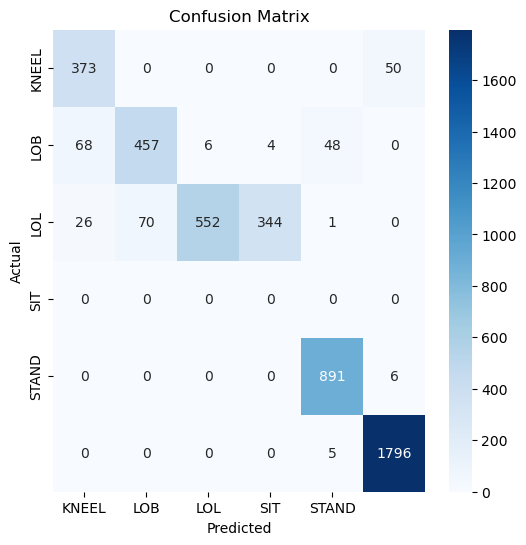


Classification Report:
              precision    recall  f1-score   support

       KNEEL       0.80      0.88      0.84       423
         LOB       0.87      0.78      0.82       583
         LOL       0.99      0.56      0.71       993
         LOR       0.00      0.00      0.00         0
         SIT       0.94      0.99      0.97       897
       STAND       0.97      1.00      0.98      1801

    accuracy                           0.87      4697
   macro avg       0.76      0.70      0.72      4697
weighted avg       0.94      0.87      0.89      4697



In [35]:
##Merging and results


#merge

import pandas as pd
from sklearn.metrics import classification_report

# Read the CSV files into pandas dataframes
predict_df = pd.read_csv(r'/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/predict2diag.csv')
truth_df = pd.read_csv(r"/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/DIAGtruth_test.csv")

# Merge dataframes based on the 'filename' column
merged_df = pd.merge(truth_df[['filename', 'truth']], predict_df[['filename', 'predict']], on='filename')

# Save the merged dataframe to a new CSV file
merged_df.to_csv(r'/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/mergedDIAG.csv', index=True)





# confusion matrix


import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(r'/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/mergedDIAG.csv')

# Extract truth and predict columns
truth = df['truth']
predict = df['predict']

# Get unique class labels
classes = sorted(truth.unique())

# Create confusion matrix
conf_matrix = confusion_matrix(truth, predict)

# Plot confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 6))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Create classification report
class_report = classification_report(truth, predict)
print("\nClassification Report:")
print(class_report)




In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 123.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 27.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


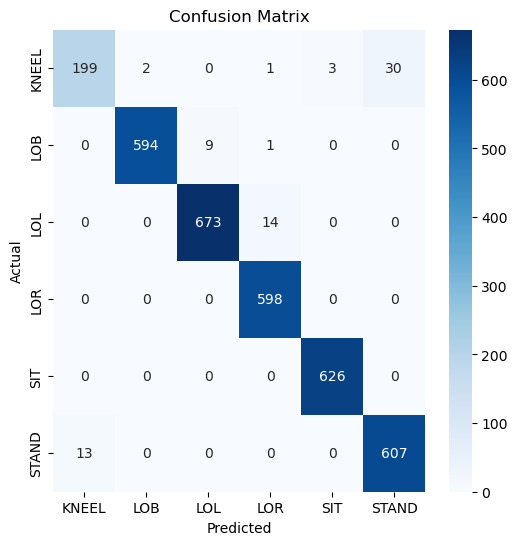

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime


# Create confusion matrix
conf_matrix = confusion_matrix(truth, predict)

# Plot confusion matrix as a heatmap with labels
plt.figure(figsize=(6,6))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Save your results

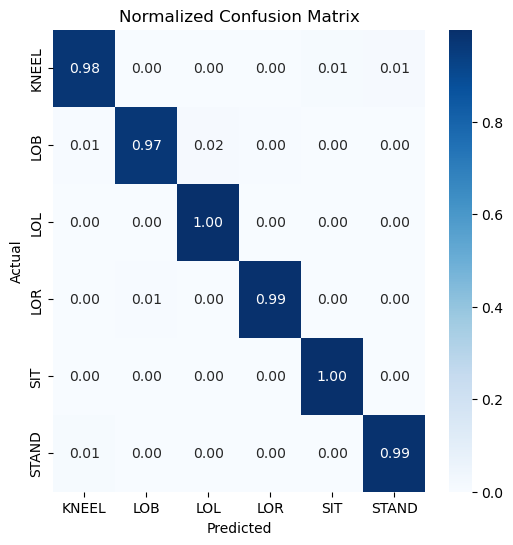

In [19]:
# Calculate normalization
import numpy as np
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 6))
sn.heatmap(conf_matrix_norm, annot=True, cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes, 
            fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

### inferencing on video


In [ ]:
!yolo task=detect mode=predict model=/common/amilab/towfiqami/Codes_models/Julycodes/runs/detect/train3/weights/best.pt conf=0.80 source=/work/amilab/towfiqami/July/1-26-18highlights.avi save=True

In [39]:
#See misprediction 
import os
import pandas as pd
import shutil

# Paths to the files and directories
merged_file_path = '/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/mergedDIAG.csv'
image_folder = '/mnt/nrdstor/amilab/towfiqami/Final/DATA/diagonal_all'
misprediction_folder = '/mnt/nrdstor/amilab/towfiqami/Final/misprediction6'

# Load the merged file
data = pd.read_csv(merged_file_path)

# Ensure required columns exist
required_columns = ['filename', 'truth', 'predict']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"The merged file must contain the following columns: {', '.join(required_columns)}")

# Filter rows where truth and predict do not match
mispredictions = data[data['truth'] != data['predict']]

# Iterate over mispredictions and copy files
for index, row in mispredictions.iterrows():
    filename = row['filename']
    truth = row['truth']
    predict = row['predict']

    # Append .png extension if not already present
    if not filename.endswith('.png'):
        filename += '.png'

    # Source image path
    source_path = os.path.join(image_folder, filename)

    # Destination folder
    subfolder_name = f"{truth} predicted {predict}"
    destination_subfolder = os.path.join(misprediction_folder, subfolder_name)
    os.makedirs(destination_subfolder, exist_ok=True)

    # Destination image path
    destination_path = os.path.join(destination_subfolder, filename)

    # Copy the image if it exists
    if os.path.exists(source_path):
        shutil.copy2(source_path, destination_path)
    else:
        print(f"Warning: Source file not found - {source_path}")

print("Mispredicted images have been copied to their respective subfolders.")


Mispredicted images have been copied to their respective subfolders.


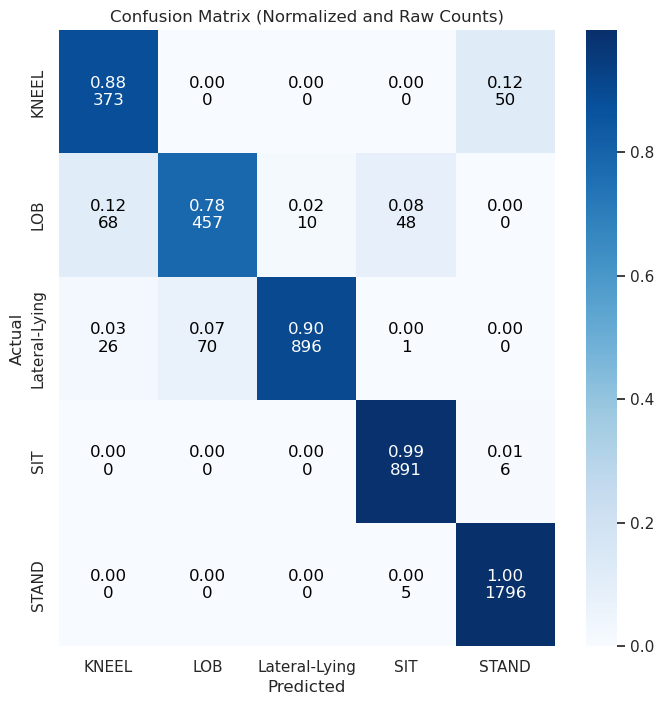


Classification Report:
               precision    recall  f1-score   support

        KNEEL       0.80      0.88      0.84       423
          LOB       0.87      0.78      0.82       583
Lateral-Lying       0.99      0.90      0.94       993
          SIT       0.94      0.99      0.97       897
        STAND       0.97      1.00      0.98      1801

     accuracy                           0.94      4697
    macro avg       0.91      0.91      0.91      4697
 weighted avg       0.94      0.94      0.94      4697



In [47]:

#DIAgonal test
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv(r'/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/mergedDIAG.csv')

# Combine LOL and LOR into Lateral-Lying for both truth and predict columns
df['truth'] = df['truth'].replace({'LOL': 'Lateral-Lying', 'LOR': 'Lateral-Lying'})
df['predict'] = df['predict'].replace({'LOL': 'Lateral-Lying', 'LOR': 'Lateral-Lying'})

# Extract truth and predict columns
truth = df['truth']
predict = df['predict']

# Define the 5 classes explicitly
classes = ['KNEEL', 'LOB', 'Lateral-Lying', 'SIT', 'STAND']

# Create confusion matrix
conf_matrix = confusion_matrix(truth, predict, labels=classes)

# Normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sn.set(font_scale=1)  # Set font scale for heatmap labels

# Create heatmap
ax = sn.heatmap(conf_matrix_norm, annot=False, fmt='.2f', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)

# Annotate heatmap with both normalized values and raw counts
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        normalized_value = conf_matrix_norm[i, j]
        raw_value = conf_matrix[i, j]
        text = f"{normalized_value:.2f}\n{raw_value}"
        color = 'black' if normalized_value < 0.5 else 'white'  # Adjust text color for readability
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color=color)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized and Raw Counts)')

# Save the plot
plt.savefig('/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/confusion_matrix_diagonal.png', dpi=300, bbox_inches='tight')
plt.draw()


plt.show()

# Create and print classification report
class_report = classification_report(truth, predict, target_names=classes)
print("\nClassification Report:")
print(class_report)


In [43]:
# Save the plot
plt.savefig('/mnt/nrdstor/amilab/towfiqami/Final/output_analysis/confusion_matrix_diagonal.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>